# Welkom bij ons notebook

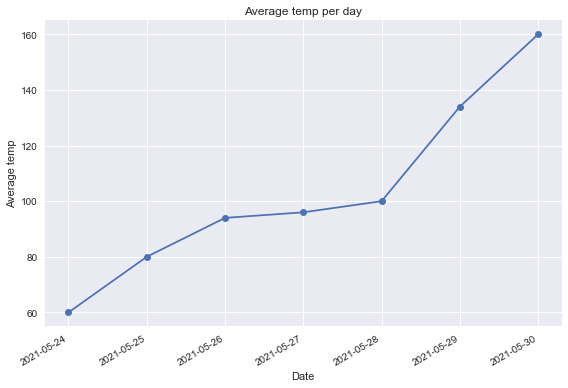

In [47]:

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

dates = [
    datetime(2021, 5, 24),
    datetime(2021, 5, 25),
    datetime(2021, 5, 26),
    datetime(2021, 5, 27),
    datetime(2021, 5, 28),
    datetime(2021, 5, 29),
    datetime(2021, 5, 30)
]

temps = [60, 80, 94, 96, 100, 134, 160]

plt.plot_date(dates, temps, linestyle = 'solid')

plt.gcf().autofmt_xdate()

# data = pd.read_csv('data.csv')
# price_date = data['Date']
# price_close = data['Close']

plt.title('Average temp per day')
plt.xlabel('Date')
plt.ylabel('Average temp')

plt.tight_layout()

plt.show()